# Random Forest Algorithm in Machine Learning


Random Forest is a machine learning algorithm that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression which makes it as ensemble learning technique. This helps in improving accuracy and reducing errors.

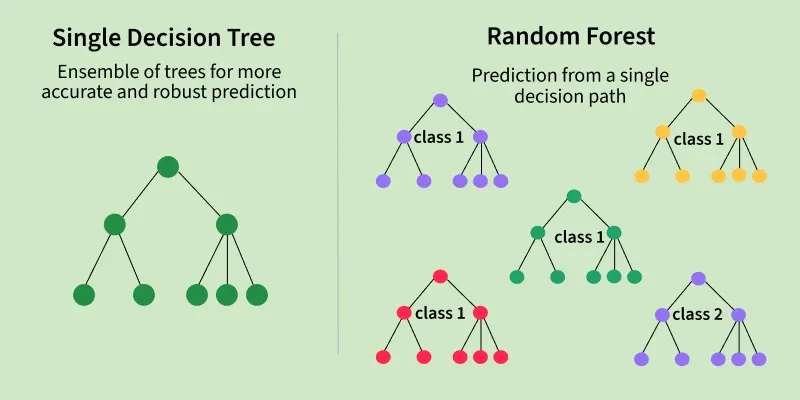

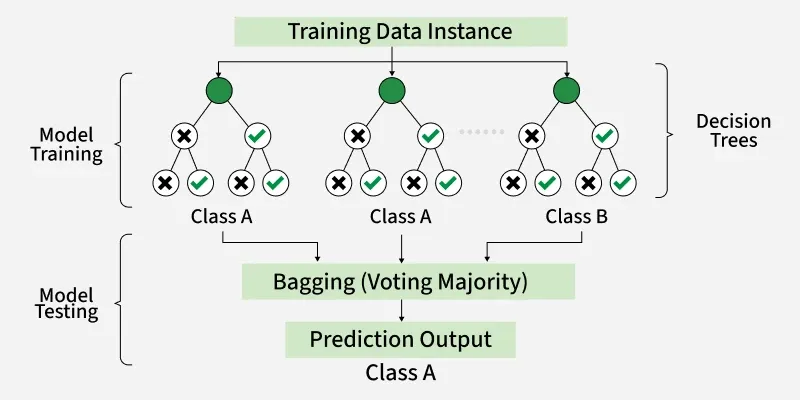

## Working of Random Forest Algorithm

* **Create Many Decision Trees:** The algorithm makes many decision trees each using a random part of the data. So every tree is a bit different.

* **Pick Random Features:** When building each tree it doesn’t look at all the features (columns) at once. It picks a few at random to decide how to split the data. This helps the trees stay different from each other.
* **Each Tree Makes a Prediction:** Every tree gives its own answer or prediction based on what it learned from its part of the data.
* **Combine the Predictions:** For classification we choose a category as the final answer is the one that most trees agree on i.e majority voting and for regression we predict a number as the final answer is the average of all the trees predictions.
* **Why It Works Well:** Using random data and features for each tree helps avoid overfitting and makes the overall prediction more accurate and trustworthy.

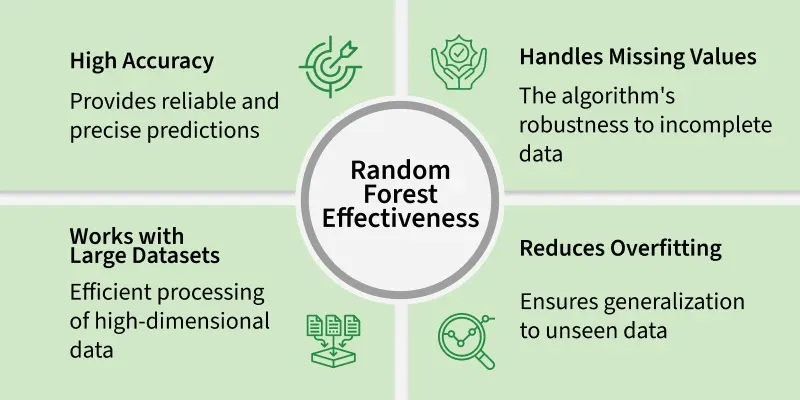

#### Key Features of Random Forest

* **Ensemble Learning:** Combines multiple decision trees to improve accuracy.
* **Randomness:** Uses random samples and features to create diverse trees.
* **Robustness:** Reduces overfitting and handles noisy data well.
* **Versatility:** Works for both classification and regression tasks.  

#### Assumptions of Random Forest

* **Independence of Trees:** Assumes that the individual decision trees are independent of each other.
* **Sufficient Data:** Requires a sufficiently large dataset to create diverse trees.
* **Feature Relevance:** Assumes that the features used for splitting are relevant to the target variable.  


## Implementing Random Forest for Classification Tasks

* Import libraries like pandas and scikit learn.
Load the Titanic dataset.
* Remove rows with missing target values ('Survived').
* Select features like class, sex, age, etc and convert 'Sex' to numbers.
* Fill missing age values with the median.
* Split the data into training and testing sets, then train a Random Forest model.
* Predict on test data, check accuracy and print a sample prediction result.

In [1]:

dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/GFG_titanic.csv"


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

titanic_data = pd.read_csv(dataset)

titanic_data = titanic_data.dropna(subset=['Survived'])

X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
X['Age'] = X['Age'].fillna(X['Age'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Sample Passenger: {'Pclass': 3.0, 'Sex': 1.0, 'Age': 28.0, 'SibSp': 1.0, 'Parch': 1.0, 'Fare': 15.2458}
Predicted Survival: Did Not Survive


# Implementing Random Forest for Regression Tasks

We will do house price prediction here.

* Load the California housing dataset and create a DataFrame with features and target.
* Separate the features and the target variable.
* Split the data into training and testing sets (80% train, 20% test).
* Initialize and train a Random Forest Regressor using the training data.
* Predict house values on test data and evaluate using MSE and R² score.
* Print a sample prediction and compare it with the actual value.


In [2]:

import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

california_housing = fetch_california_housing()
california_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_data['MEDV'] = california_housing.target

X = california_data.drop('MEDV', axis=1)
y = california_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

single_data = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_regressor.predict(single_data)
print(f"Predicted Value: {predicted_value[0]:.2f}")
print(f"Actual Value: {y_test.iloc[0]:.2f}")

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Predicted Value: 0.51
Actual Value: 0.48
Mean Squared Error: 0.26
R-squared Score: 0.81


## Advantages of Random Forest
* **High Accuracy:** Combines multiple trees to improve prediction accuracy.
* **Robustness:** Reduces overfitting and handles noisy data well.
* **Versatility:** Works for both classification and regression tasks.
* **Feature Importance:** Identifies important features in the data.

## Limitations of Random Forest
* **Complexity:** More complex and harder to interpret than single decision trees.
* **Computationally Intensive:** Requires more computational resources and time to train. 

## Random Forest Classifier using Scikit-learn

Random Forest is a method that combines the predictions of multiple decision trees to produce a more accurate and stable result. It can be used for both classification and regression tasks. In classification tasks, Random Forest Classification predicts categorical outcomes based on the input data. It uses multiple decision trees and outputs the label that has the maximum votes among all the individual tree predictions.

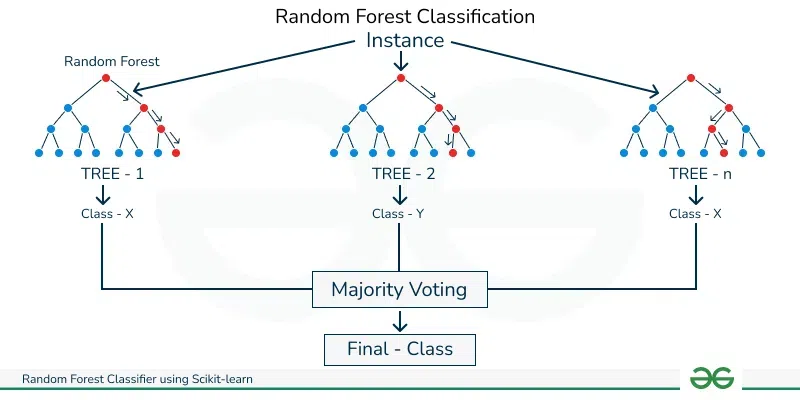

###  Working of Random Forest Classifier

* Bootstrap Sampling: Random rows are picked (with replacement) to train each tree.
* Random Feature Selection: Each tree uses a random set of features (not all features).
* Build Decision Trees: Trees split the data using the best feature from their random set. Splitting continues until a stopping rule is met (like max depth).
* Make Predictions: Each tree gives its own prediction.
* Majority Voting: The final prediction is the one most tree agree on.



## Implementing Random Forest Classification in Python

Before implementing random forest classifier in Python let's first understand it's parameters.

* n_estimators: Number of trees in the forest.
* max_depth: Maximum depth of each tree.
* max_features: Number of features considered for splitting at each node.
* criterion: Function used to measure split quality ('gini' or 'entropy').
* min_samples_split: Minimum samples required to split a node.
* min_samples_leaf: Minimum samples required to be at a leaf node.
* bootstrap: Whether to use bootstrap sampling when building trees (True or False).

#### 1. Import Required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

#### 2. Import Dataset

In [4]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 3. Data Preparation

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### 4. Splitting the Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 5. Feature Scaling

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 6. Building Random Forest Classifier

In [8]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#### 7. Evaluation of the Model

Accuracy: 100.00%


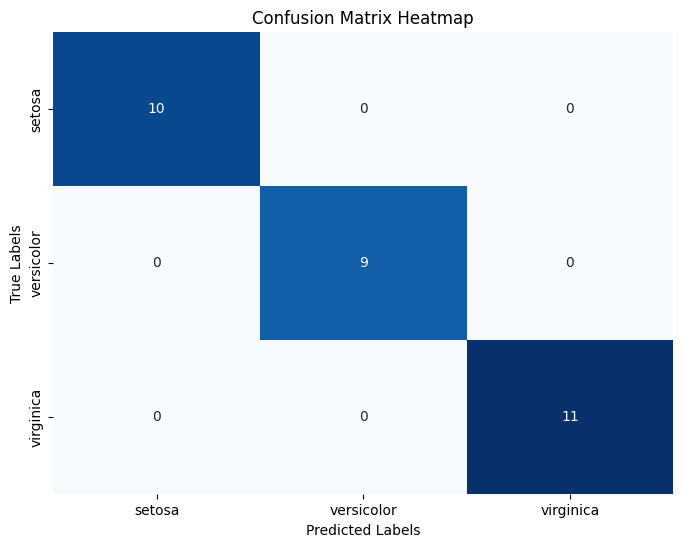

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 8. Feature Importance

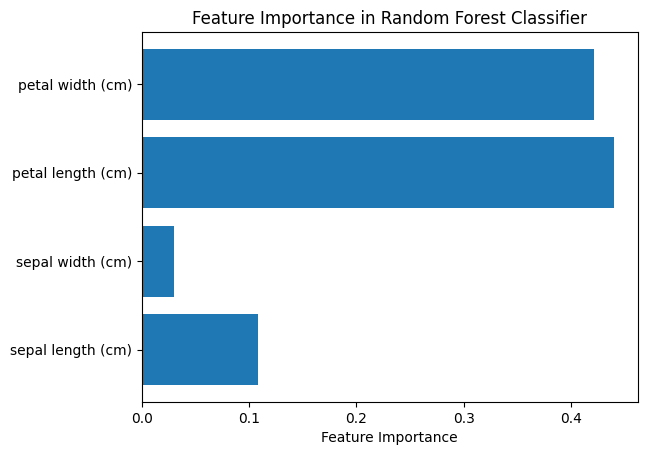

In [10]:
feature_importances = classifier.feature_importances_

plt.barh(iris.feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

From the graph we can see that petal width (cm) is the most important feature followed closely by petal length (cm). The sepal width (cm) and sepal length (cm) have lower importance in determining the model’s predictions. This indicates that the classifier relies more on the petal measurements to make predictions about the flower species.

# Random Forest Regression in Python

A random forest is an ensemble learning method that combines the predictions from multiple decision trees to produce a more accurate and stable prediction. It can be used for both classification and regression tasks. In a regression task, we can use the Random Forest Regression technique for predicting numerical values. It predicts continuous values by averaging the results of multiple decision trees.

![alt text](Capture482.png)

After the trees are trained each tree make a prediction and the final prediction for regression tasks is the average of all the individual tree predictions and this process is called as Aggregation.

## Implementing Random Forest Regression in Python

#### 1. Importing Libraries

* **RandomForestRegressor:** This is the regression model that is based upon the Random Forest model.
* **LabelEncoder:** This class is used to encode categorical data into numerical values.
* **KNNImputer:** This class is used to impute missing values in a dataset using a k-nearest neighbors approach.
* **train_test_split:** This function is used to split a dataset into training and testing sets.
* **StandardScaler:** This class is used to standardize features by removing the mean and scaling to unit variance.
* **f1_score:** This function is used to evaluate the performance of a classification model using the F1 score.
* **RandomForestRegressor:** This class is used to train a random forest regression model.
* **cross_val_score:** This function is used to perform k-fold cross-validation to evaluate the performance of a model

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

#### 2. Importing Dataset

In [12]:
dataseet = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/Position_Salaries.csv"

df= pd.read_csv(dataseet)
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [14]:
df.shape

(10, 3)

#### 3. Data Preparation

In [15]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

#### 4. Random Forest Regressor Model

The code processes categorical data by encoding it numerically, combines the processed data with numerical data and trains a Random Forest Regression model using the prepared data.

* **RandomForestRegressor:** It builds multiple decision trees and combines their predictions.
* **n_estimators=10:** Defines the number of decision trees in the Random Forest.
* **random_state=0:** Ensures the randomness in model training is controlled for reproducibility.
* **oob_score=True:** Enables out-of-bag scoring which evaluates the model's performance using data not seen by individual trees during training.
* **LabelEncoder():** Converts categorical variables (object type) into numerical values, making them suitable for machine learning models.
* **apply(label_encoder.fit_transform):** Applies the LabelEncoder transformation to each categorical column, converting string labels into numbers.
* **concat():** Combines the numerical and encoded categorical features horizontally into one dataset which is then used as input for the model.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(x)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.644879832593859
Mean Squared Error: 2647325000.0
R-squared: 0.9671801245316117


#### 6. Visualizing

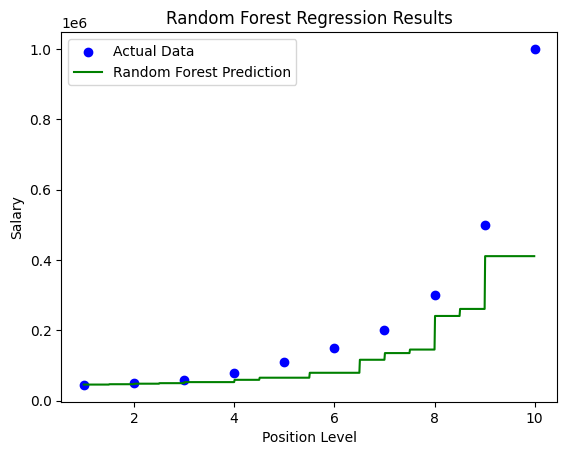

In [18]:
import numpy as np
   
X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)  # Only the first feature
X_grid = X_grid.reshape(-1, 1)
X_grid = np.hstack((X_grid, np.zeros((X_grid.shape[0], 2))))  # Pad with zeros

plt.scatter(X[:, 0], y, color='blue', label="Actual Data")
plt.plot(X_grid[:, 0], regressor.predict(X_grid), color='green', label="Random Forest Prediction")  
plt.title("Random Forest Regression Results")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

#### 7. Visualizing a Single Decision Tree from the Random Forest Model

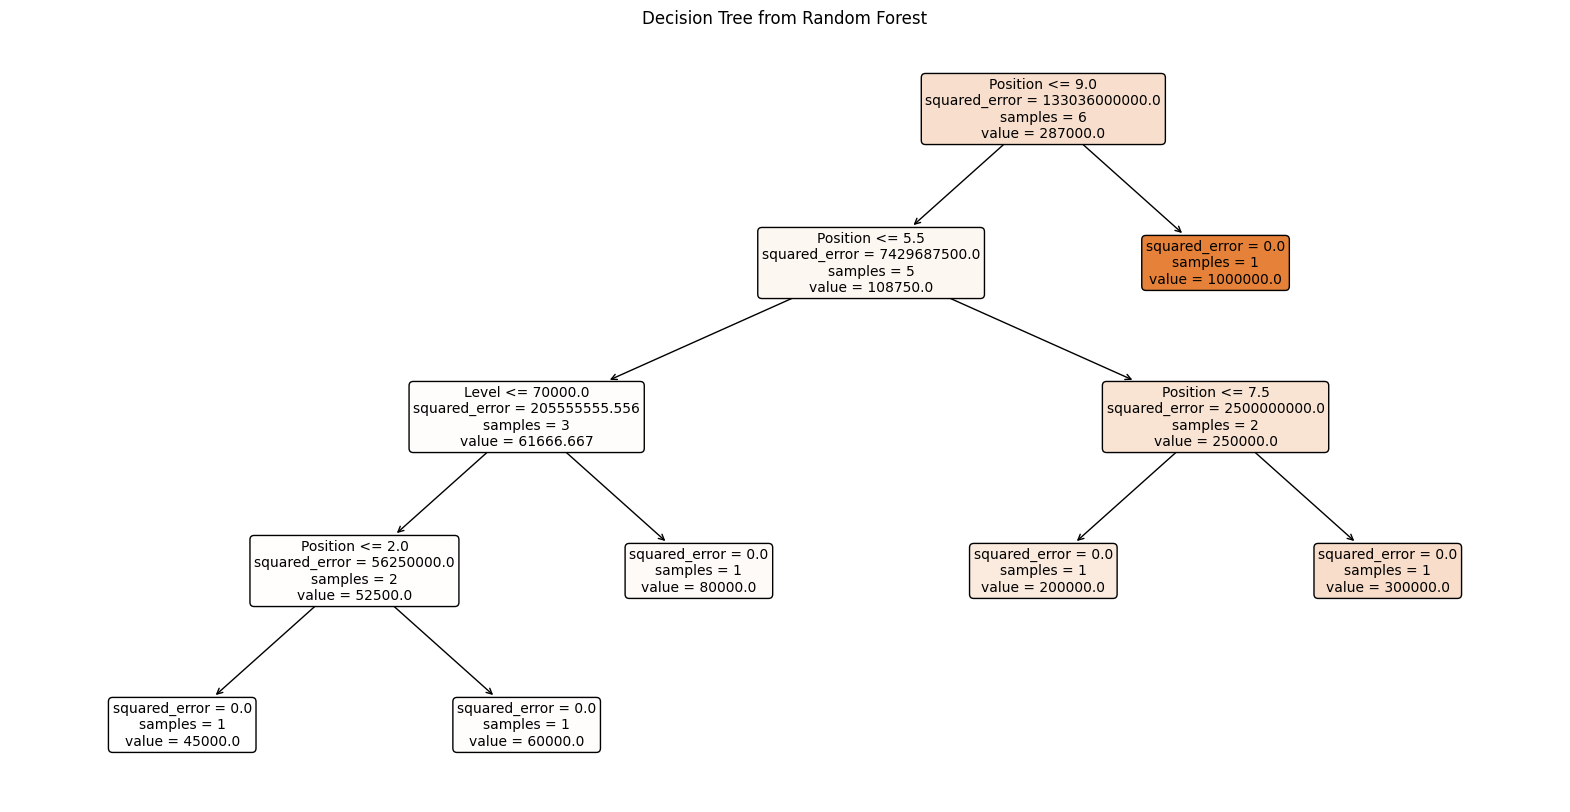

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

## Applications of Random Forest Regression

* **Stock Market Prediction:** Predicting stock prices based on historical data and market indicators.
* **Weather Forecasting:** Predicting temperature, rainfall, and other weather conditions.
* **Real Estate Valuation:** Estimating property prices based on features like location, size, and amenities.
* **Medical Diagnosis:** Predicting disease progression or patient outcomes based on medical data.